# Diabetes-Prediction-Model
### By Aarshabh Agrawal and Anish Ayare

## Step 1: Load the Dataset

In this step, we are going to install packages, load the dataset and remove unecessary and irrelevant attributes.

In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install missingno
%pip install scikit-learn
%pip install graphviz


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np  
import pandas as pd  
import os
import random

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

In [5]:
df = pd.read_csv('diabetes_data.csv')
df.shape

(70692, 18)

In [6]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [8]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing
df = add_random_missing_values(df, missing_rate=0.02)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   69306 non-null  float64
 1   Sex                   69231 non-null  float64
 2   HighChol              69324 non-null  float64
 3   CholCheck             69277 non-null  float64
 4   BMI                   69315 non-null  float64
 5   Smoker                69294 non-null  float64
 6   HeartDiseaseorAttack  69305 non-null  float64
 7   PhysActivity          69259 non-null  float64
 8   Fruits                69261 non-null  float64
 9   Veggies               69298 non-null  float64
 10  HvyAlcoholConsump     69316 non-null  float64
 11  GenHlth               69303 non-null  float64
 12  MentHlth              69253 non-null  float64
 13  PhysHlth              69294 non-null  float64
 14  DiffWalk              69297 non-null  float64
 15  Stroke             

In [10]:
df.head(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0


In [11]:
df.tail(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


## Step 2: Data Cleanup

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")

Column: Age
Unique Values: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5. nan  2.]

Column: Sex
Unique Values: [ 1.  0. nan]

Column: HighChol
Unique Values: [ 0.  1. nan]

Column: CholCheck
Unique Values: [ 1. nan  0.]

Column: BMI
Unique Values: [nan 26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 47.
 19. 37. 41. 23. 34. 36. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92.
 53. 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 76. 66. 85. 70. 83. 80. 78. 74.]

Column: Smoker
Unique Values: [ 0.  1. nan]

Column: HeartDiseaseorAttack
Unique Values: [ 0.  1. nan]

Column: PhysActivity
Unique Values: [ 1.  0. nan]

Column: Fruits
Unique Values: [ 0.  1. nan]

Column: Veggies
Unique Values: [ 1.  0. nan]

Column: HvyAlcoholConsump
Unique Values: [ 0.  1. nan]

Column: GenHlth
Unique Values: [ 3.  1.  2.  4.  5. nan]

Column: MentHlth
Unique Values: [ 5.  0.  7.  3.  4.  2. 30

In [14]:
categorical_col = [col for col in df.columns if df[col].nunique() == 2] 

In [15]:
numerical_col = [col for col in df.columns if col not in categorical_col]

In [16]:
categorical_col

['Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [17]:
numerical_col

['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

In [18]:
df.columns[df.isnull().any()].tolist()

['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

In [19]:
df.isnull().sum()

Age                     1386
Sex                     1461
HighChol                1368
CholCheck               1415
BMI                     1377
Smoker                  1398
HeartDiseaseorAttack    1387
PhysActivity            1433
Fruits                  1431
Veggies                 1394
HvyAlcoholConsump       1376
GenHlth                 1389
MentHlth                1439
PhysHlth                1398
DiffWalk                1395
Stroke                  1319
HighBP                  1416
Diabetes                1409
dtype: int64

In [20]:
df[df.isnull().any(axis = 1)]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,NaN,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
7,6.0,1.0,NaN,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,NaN,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70683,10.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0
70687,6.0,0.0,1.0,1.0,37.0,NaN,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,NaN,0.0,1.0


In [21]:
df[df.notnull().all(axis = 1)]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0


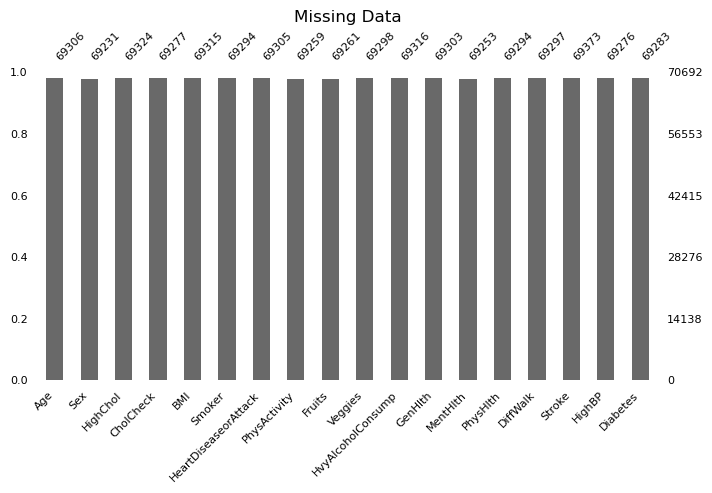

In [22]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 8)
plt.title("Missing Data", fontsize=12)
plt.show()

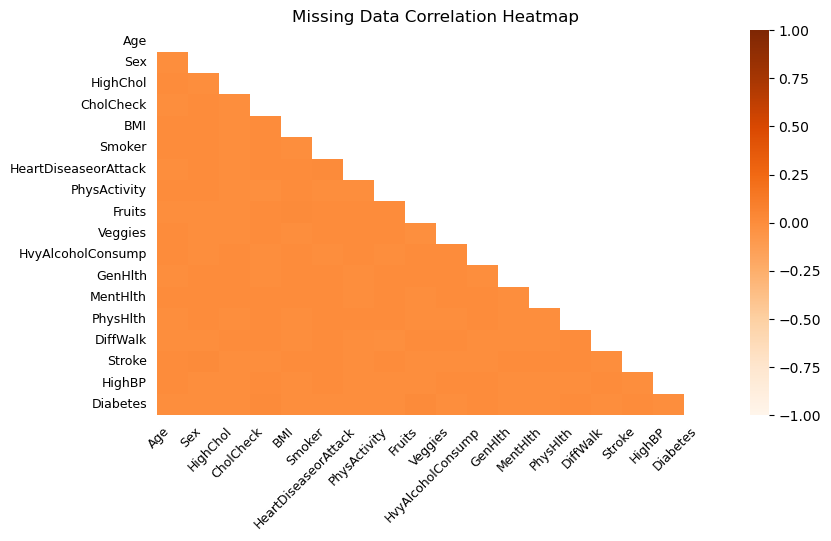

In [23]:
msno.heatmap(df = df,
             figsize = (9, 5),
             fontsize = 9,
             cmap='Oranges')
plt.title("Missing Data Correlation Heatmap", fontsize=12)
plt.show()

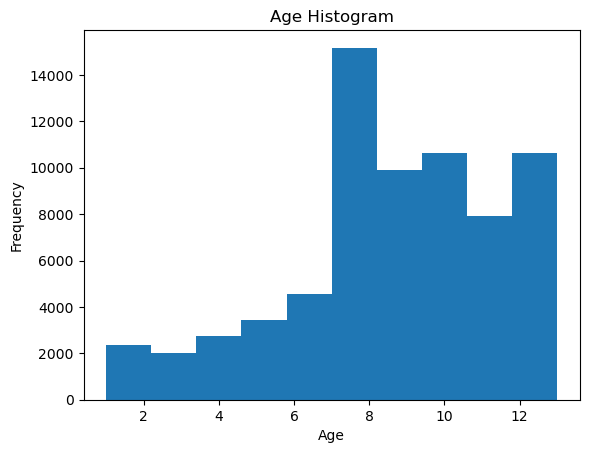

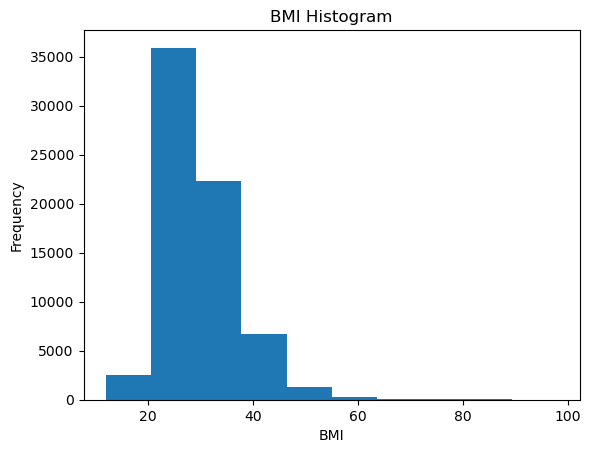

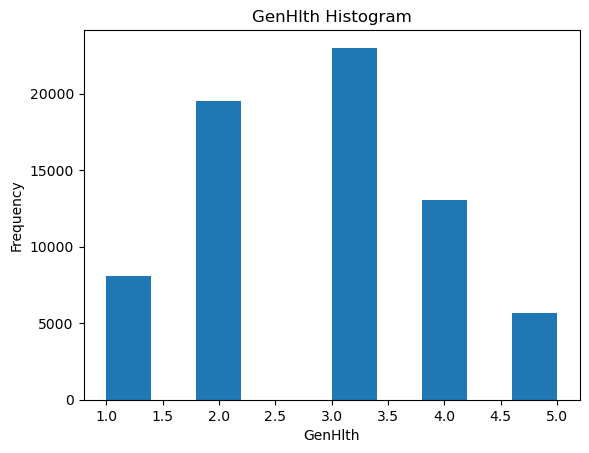

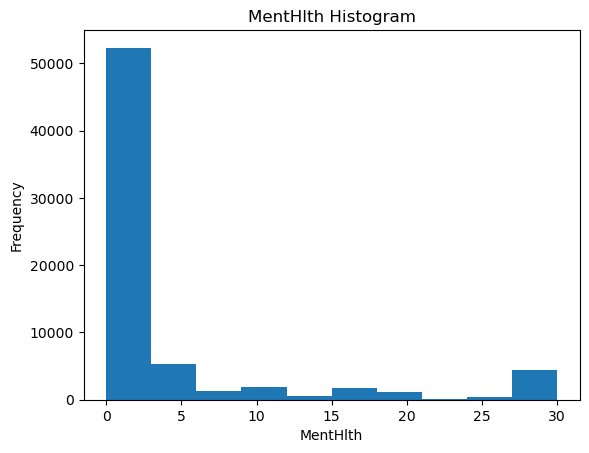

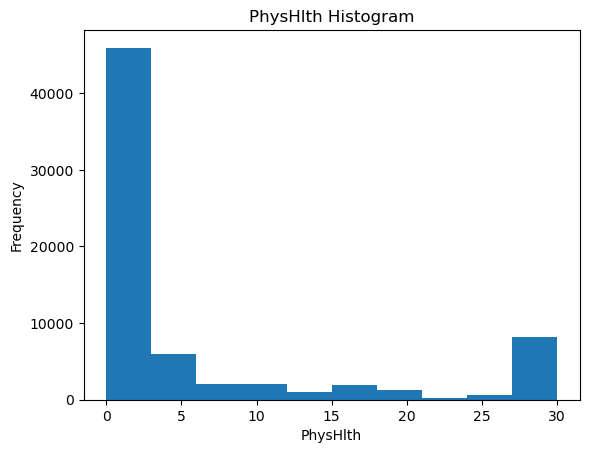

In [24]:
for col in numerical_col:
    plt.hist(df[col])
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [25]:
for col in numerical_col:
    mean = df[col].mean() 
    df[col] = df[col].fillna(mean)  

for col in categorical_col:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

print(df.isnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [26]:
df.head(1)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,29.860131,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [28]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.00000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.585591,0.446797,0.535068,0.975839,29.860131,0.465385,0.144811,0.708963,0.619844,0.792820,0.041886,2.837150,3.74996,5.815799,0.247723,0.061252,0.572087,0.489645
std,2.825216,0.497165,0.498772,0.153550,7.044287,0.498804,0.351913,0.454244,0.485428,0.405289,0.200330,1.102248,8.07108,9.968571,0.431693,0.239793,0.494780,0.499896
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.00000,5.815799,0.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.00000,30.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Data Visualization

C:\Users\anish\AppData\Local\Temp\ipykernel_26400\2896322057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


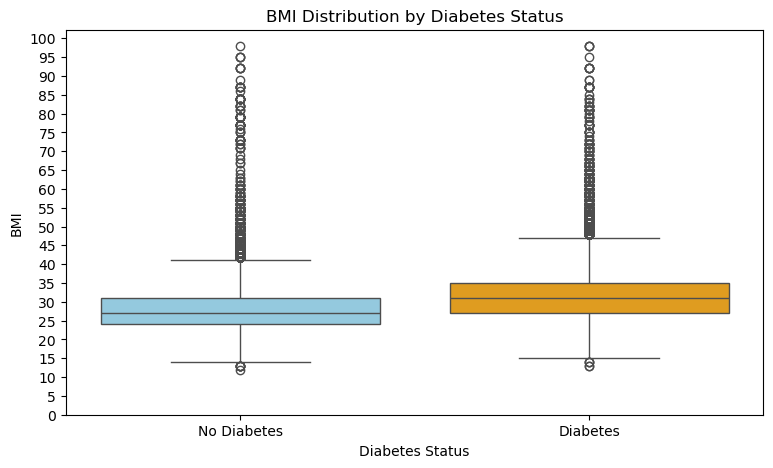

In [30]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='Diabetes',
    y='BMI', 
    data=df, 
    palette=['skyblue', 'orange'],
    legend=False
)

plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

bmi_ticks = range(0, int(df['BMI'].max()) + 5, 5)
plt.yticks(bmi_ticks)
plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_26400\2491081587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


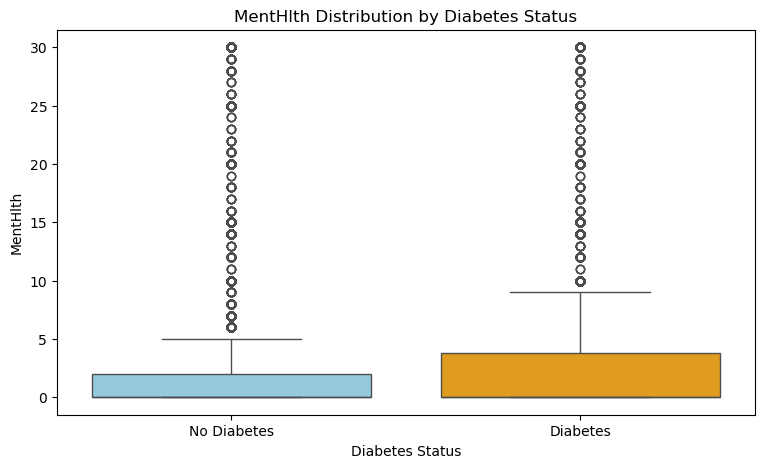

C:\Users\anish\AppData\Local\Temp\ipykernel_26400\2491081587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


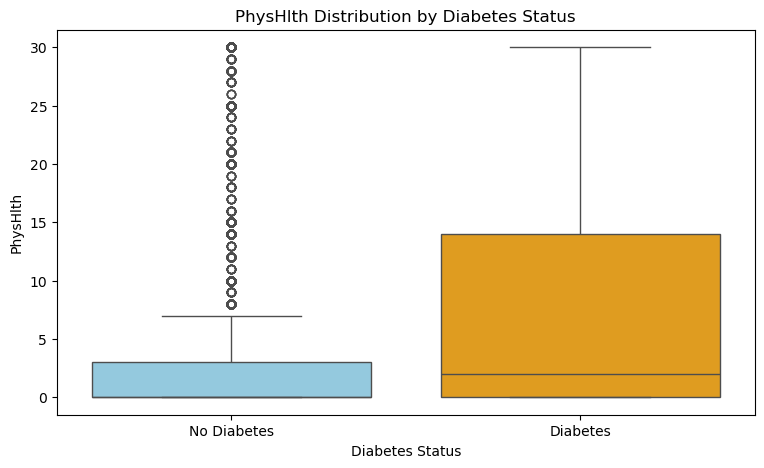

In [31]:
health_info = [
    'MentHlth', 'PhysHlth'
]

for info in health_info:
    plt.figure(figsize=(9, 5))
    sns.boxplot(
    x='Diabetes',
    y=f'{info}', 
    data=df, 
    palette=['skyblue', 'orange'],
    legend=False
    )
    plt.title(f'{info} Distribution by Diabetes Status')
    plt.xlabel('Diabetes Status')
    plt.ylabel(f'{info}')
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_26400\453316944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


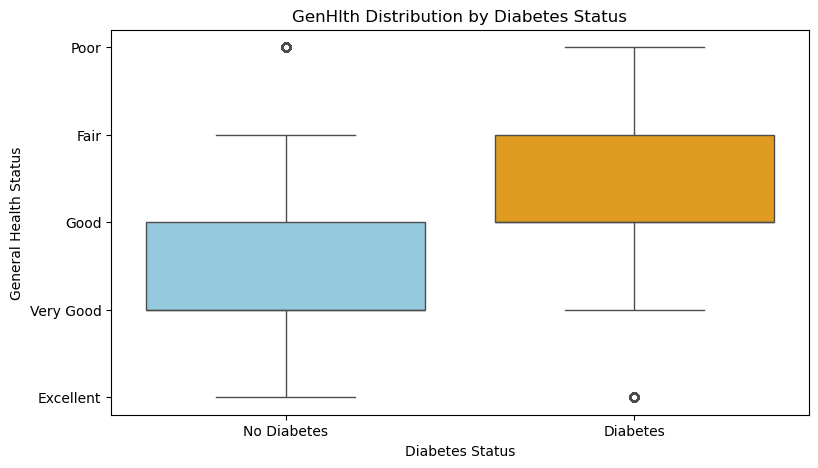

In [32]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='Diabetes',
    y='GenHlth',
    data=df,
    palette=['skyblue', 'orange'],
    legend=False)
plt.title('GenHlth Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
plt.yticks([1, 2, 3, 4, 5], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], fontsize=10)
plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_26400\578701262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


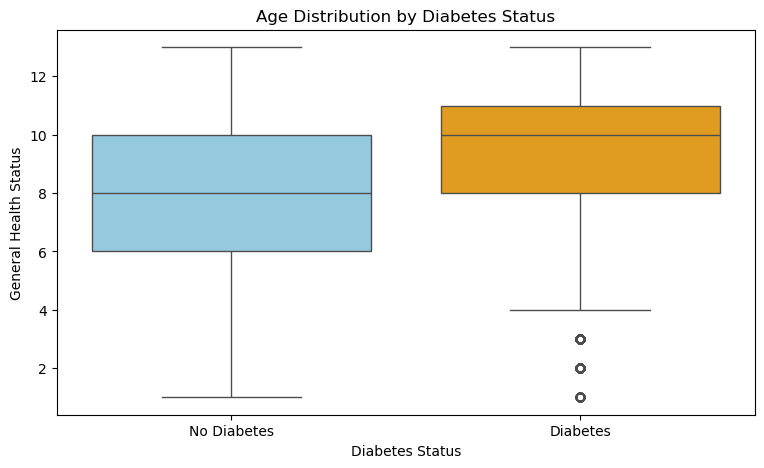

In [33]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x='Diabetes',
    y='Age',
    data=df,
    palette=['skyblue', 'orange'],
    legend=False)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('General Health Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
plt.show()

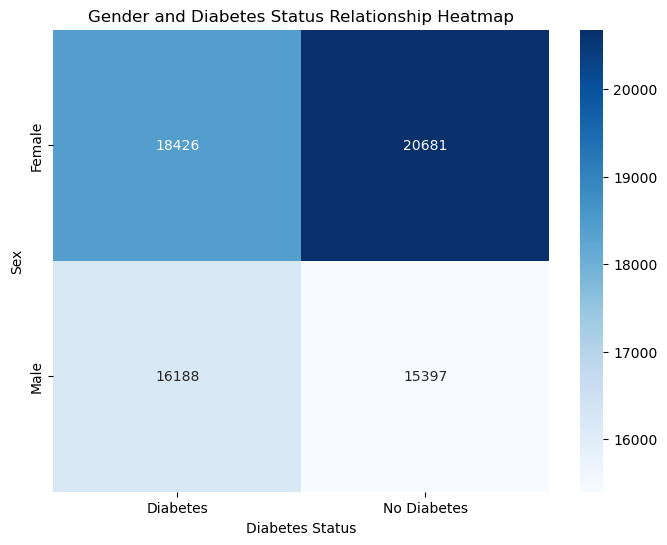

In [34]:
contingency_table = pd.crosstab(df['Sex'].map({0: 'Female', 1: 'Male'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Gender and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Sex')
plt.show()

In [35]:
diabetic_men = len(df[(df['Sex'] == 1) & (df['Diabetes'] == 1)])  
total_men = len(df[df['Sex'] == 1])

diabetic_women = len(df[(df['Sex'] == 0) & (df['Diabetes'] == 1)]) 
total_women = len(df[df['Sex'] == 0])  

diabetes_rate_men = diabetic_men / total_men
diabetes_rate_women = diabetic_women / total_women

print(f'Diabetes Rate-')
print(f'men: {diabetes_rate_men:.3f}')
print(f'women: {diabetes_rate_women:.3f}')

Diabetes Rate-
men: 0.513
women: 0.471


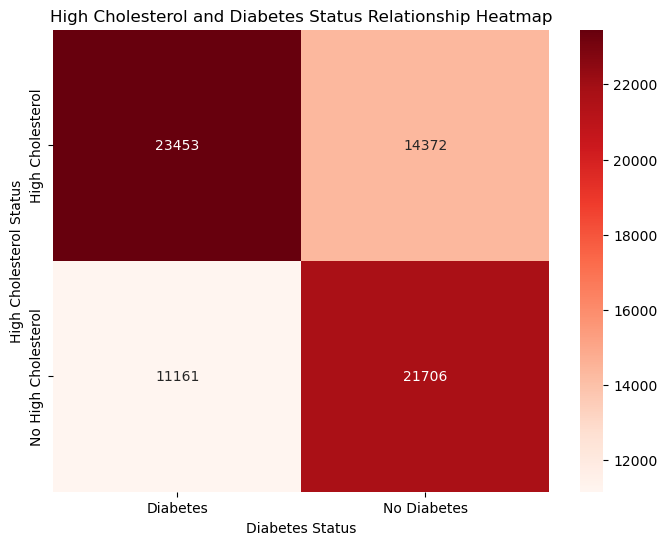

In [36]:
contingency_table = pd.crosstab(df['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('High Cholesterol and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('High Cholesterol Status')
plt.show()

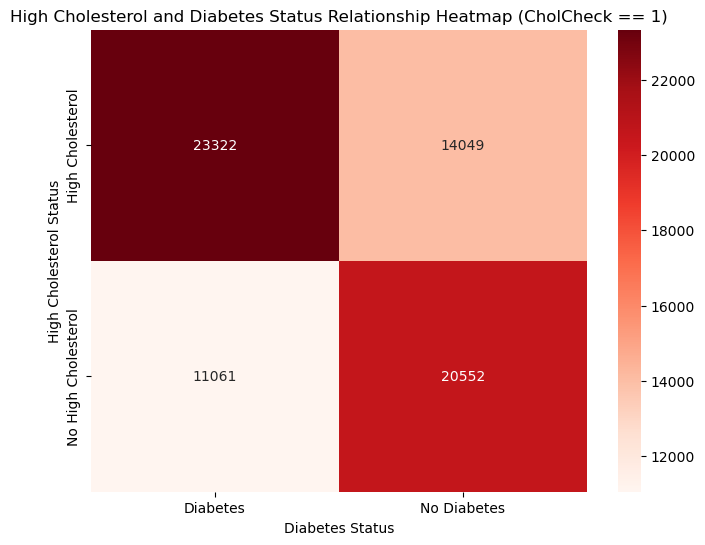

In [37]:
df_filtered = df[df['CholCheck'] == 1]
contingency_table = pd.crosstab(df_filtered['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'}),
                                df_filtered['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('High Cholesterol and Diabetes Status Relationship Heatmap (CholCheck == 1)')
plt.xlabel('Diabetes Status')
plt.ylabel('High Cholesterol Status')
plt.show()

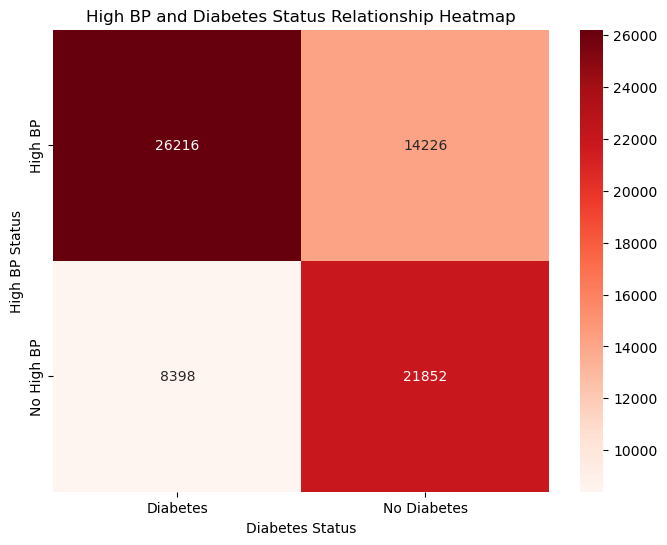

In [38]:
contingency_table = pd.crosstab(df['HighBP'].map({0: 'No High BP', 1: 'High BP'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('High BP and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('High BP Status')
plt.show()

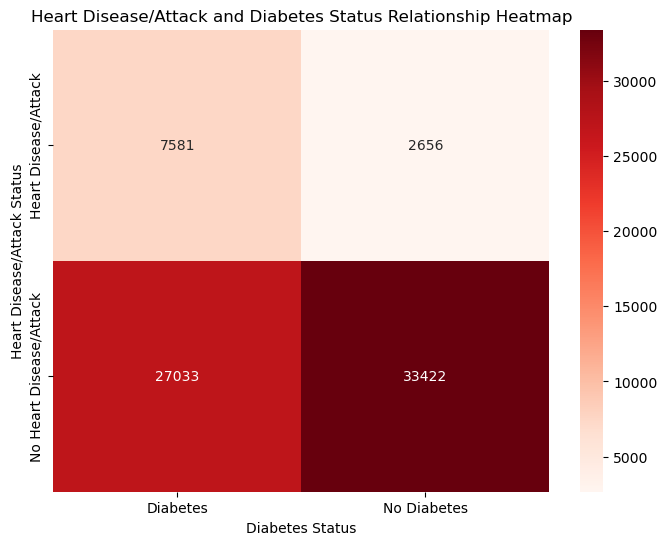

In [39]:
contingency_table = pd.crosstab(df['HeartDiseaseorAttack'].map({0: 'No Heart Disease/Attack', 1: 'Heart Disease/Attack'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Heart Disease/Attack and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Heart Disease/Attack Status')
plt.show()

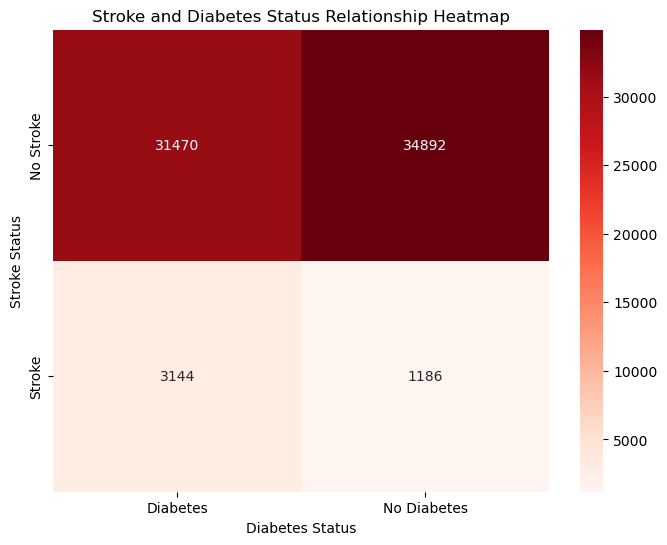

In [40]:
contingency_table = pd.crosstab(df['Stroke'].map({0: 'No Stroke', 1: 'Stroke'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Stroke and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Stroke Status')
plt.show()

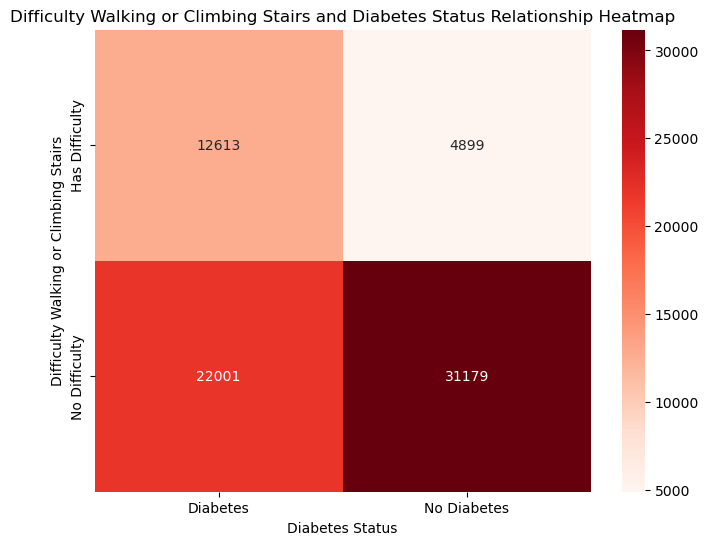

In [41]:
contingency_table = pd.crosstab(df['DiffWalk'].map({0: 'No Difficulty', 1: 'Has Difficulty'}),
                                df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Difficulty Walking or Climbing Stairs and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Difficulty Walking or Climbing Stairs')
plt.show()

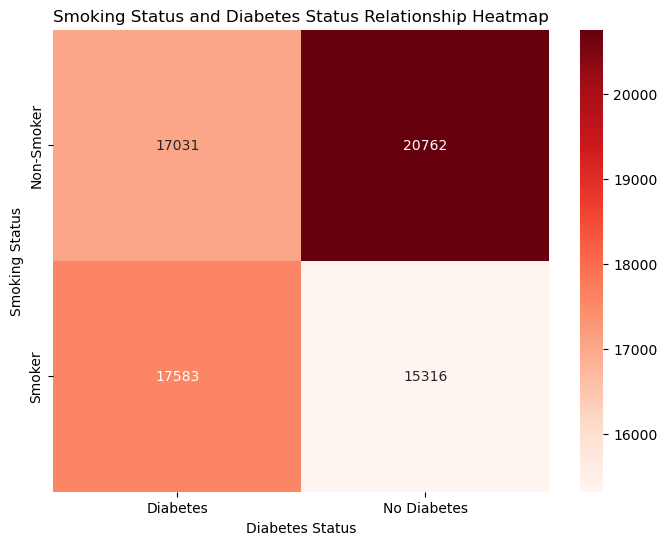

In [42]:
contingency_table_smoker = pd.crosstab(df['Smoker'].map({0: 'Non-Smoker', 1: 'Smoker'}),
                                       df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_smoker, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Smoking Status and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Smoking Status')
plt.show()

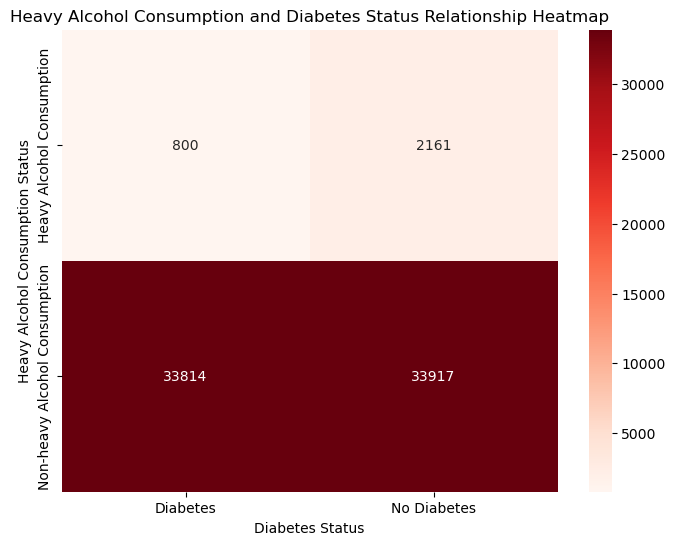

In [43]:
contingency_table_alcohol = pd.crosstab(df['HvyAlcoholConsump'].map({0: 'Non-heavy Alcohol Consumption', 1: 'Heavy Alcohol Consumption'}),
                                        df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_alcohol, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Heavy Alcohol Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Heavy Alcohol Consumption Status')
plt.show()

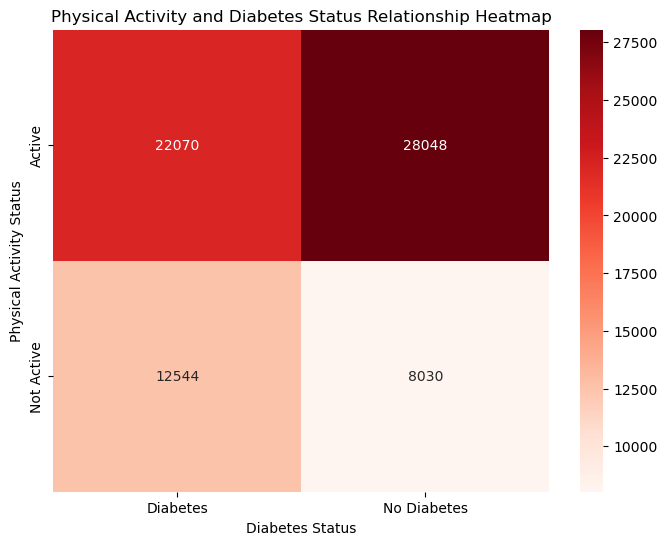

In [44]:
contingency_table_phys = pd.crosstab(df['PhysActivity'].map({0: 'Not Active', 1: 'Active'}),
                                     df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_phys, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Physical Activity and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Activity Status')
plt.show()

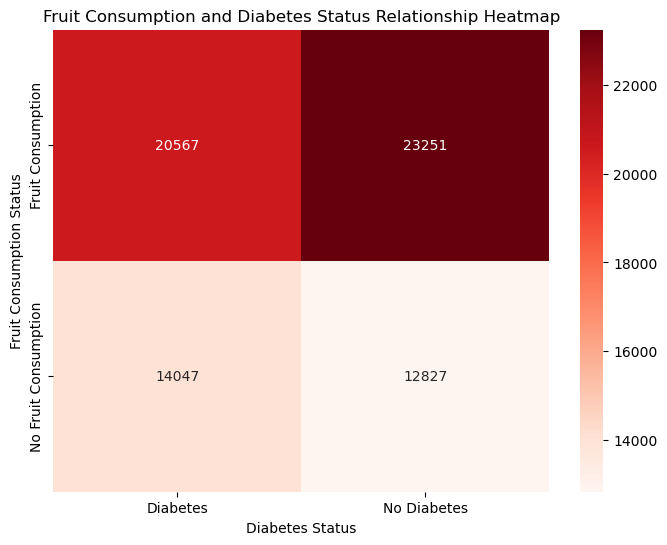

In [45]:
contingency_table_fruits = pd.crosstab(df['Fruits'].map({0: 'No Fruit Consumption', 1: 'Fruit Consumption'}),
                                       df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_fruits, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Fruit Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Fruit Consumption Status')
plt.show()

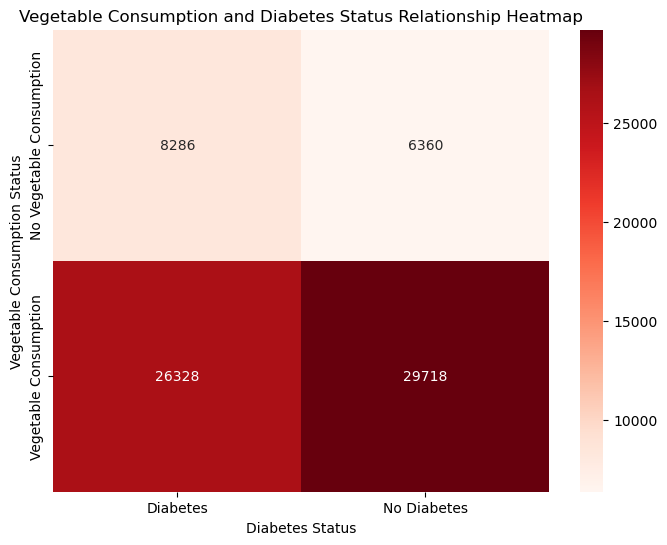

In [46]:
contingency_table_veggies = pd.crosstab(df['Veggies'].map({0: 'No Vegetable Consumption', 1: 'Vegetable Consumption'}),
                                        df['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_veggies, annot=True, cmap='Reds', fmt='d', cbar=True)
plt.title('Vegetable Consumption and Diabetes Status Relationship Heatmap')
plt.xlabel('Diabetes Status')
plt.ylabel('Vegetable Consumption Status')
plt.show()

## Step 4 Feature Selection

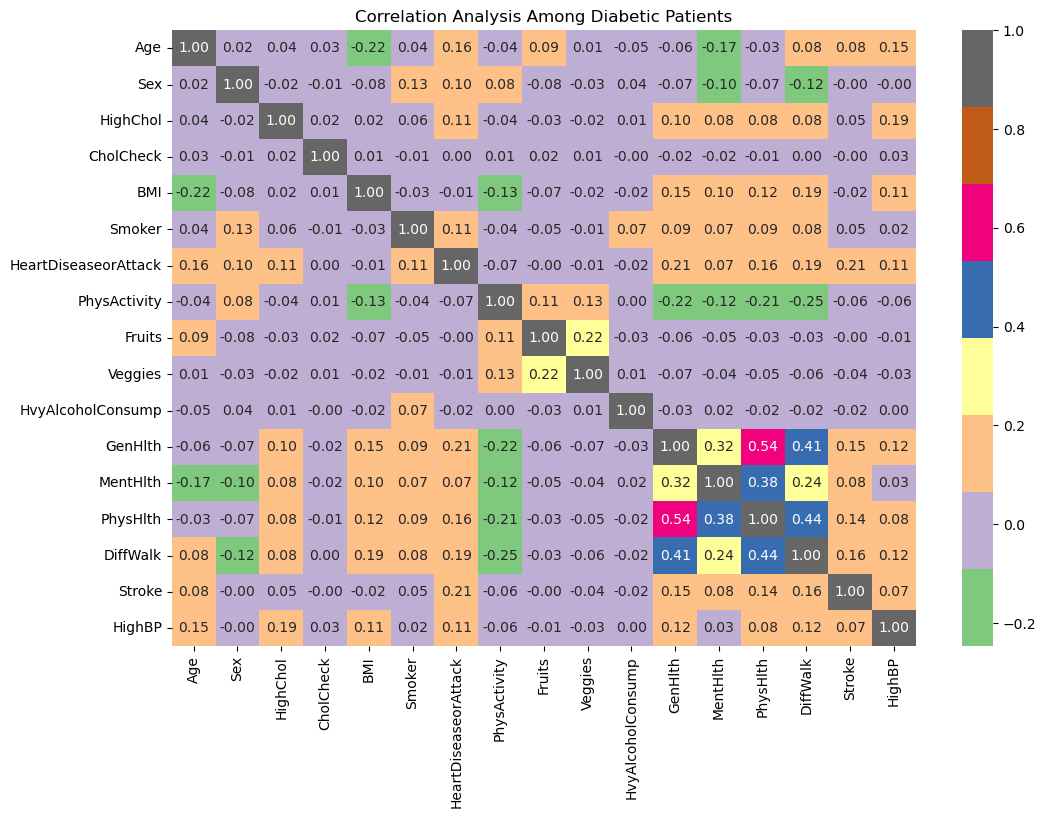

In [48]:
df_diabetes = df[df['Diabetes'] == 1]
df_diabetes_numeric = df_diabetes.drop(columns=['Diabetes']).select_dtypes(include=['float64'])
correlation_matrix = df_diabetes_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Accent', fmt='.2f', cbar=True)
plt.title('Correlation Analysis Among Diabetic Patients')
plt.show()

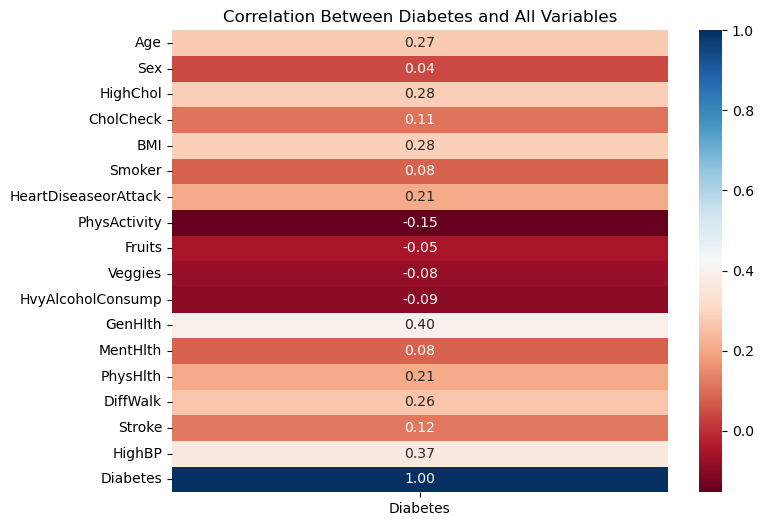

In [49]:
correlation_matrix = df.corr()
diabetes_related_corr = correlation_matrix[['Diabetes']]
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_related_corr, annot=True, cmap='RdBu', fmt='.2f', cbar=True)
plt.title('Correlation Between Diabetes and All Variables')
plt.show()

## Step 4 Feature Scaling

In [51]:
X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']

x_cols = X.columns
print(x_cols)

y.head(0)

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')


Series([], Name: Diabetes, dtype: float64)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(14139, 17)

In [53]:
cols = X_train.columns

In [54]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head(0)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP


## Step 5 Naive Bayes Implementation

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([0., 1., 0., ..., 1., 0., 1.])

In [58]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [59]:
from sklearn.metrics import accuracy_score

print('accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

accuracy: 0.7162


In [60]:
y_pred_train = gnb.predict(X_train)
print('accuracy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

accuracy: 0.7184


In [61]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7184
Test set score: 0.7162


In [62]:
y_test.value_counts()
null_accuracy = (7407/(7407+2362))
print('Null accuracy: {0:0.4f}'. format(null_accuracy))

Null accuracy: 0.7582


We can see that our model accuracy score is 0.7225 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5187 2049]
 [1963 4940]]


<Axes: >

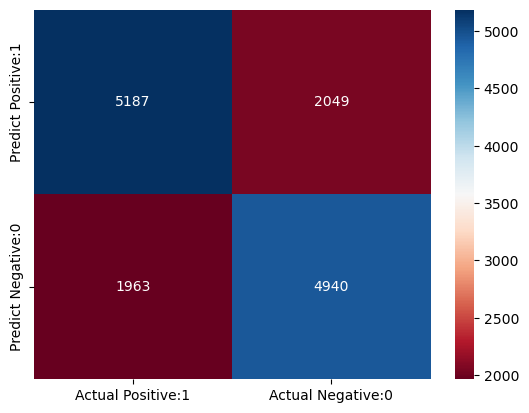

In [65]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu')

In [66]:
TP = cm[0,0] #true positive
TN = cm[1,1] #true negative
FP = cm[0,1] #false positive
FN = cm[1,0] #false negative

In [67]:
print(TP, TN, FP, FN)

5187 4940 2049 1963


In [68]:
class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

Classification accuracy : 0.7162


In [69]:
class_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(class_error))

Classification error : 0.2838


In [70]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7168


In [71]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7255


In [72]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7255


In [73]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2932


In [74]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7068


In [75]:
y_pred_prob = gnb.predict_proba(X_test)[0:5]
y_pred_prob

array([[6.95765462e-01, 3.04234538e-01],
       [2.31683610e-01, 7.68316390e-01],
       [6.93101149e-01, 3.06898851e-01],
       [5.31367259e-01, 4.68632741e-01],
       [8.35591937e-04, 9.99164408e-01]])

## Observations

### In each row, the numbers sum to 1.

### There are 2 columns which correspond to 2 classes - Diabetic and non-diabetic.
    Class 0 => if a person does not have diabetes.
    Class 1 => if a person has diabetis.

### Importance of predicted probabilities
    We can rank the observations by probability of whether a person is diabetic or non-diabetic.

### predict_proba process
    Predicts the probabilities
    Choose the class with the highest probability

### Classification threshold level
    There is a classification threshold level of 0.5.
    Class 0 => A person does not have diabetes < 0.5.
    Class 1 => A person have diabetes > 0.5.

In [77]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Diabetes', 'Prob of no Diabetes'])
y_pred_prob_df

,Prob of Diabetes,Prob of no Diabetes
0,0.695765,0.304235
1,0.231684,0.768316
2,0.693101,0.306899
3,0.531367,0.468633
4,0.000836,0.999164


In [78]:
gnb.predict_proba(X_test)[0:10, 1]
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

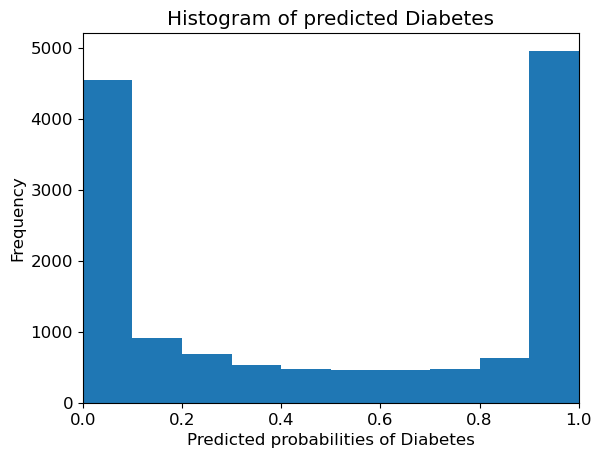

In [79]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted Diabetes')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of Diabetes')
plt.ylabel('Frequency')

## Observations

We can see that the above histogram is highly positive skewed.

The first column tell us that there are approximately 4700 observations with probability between 0.0 and 0.1.

There are relatively small number of observations with probability > 0.5.

So, these small number of observations predict that the person have diabetes.

There is almost an equal distribution of people with and without diabetes

## Step 6 Decision tree Implementation

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

In [83]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

In [84]:
print('Test Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))

Test Accuracy: 0.7113


In [85]:
y_pred_train = dt.predict(X_train)
print('Training Accuracy: {:.4f}'.format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training Accuracy: 0.7113
Training set score: 0.7113
Test set score: 0.7083


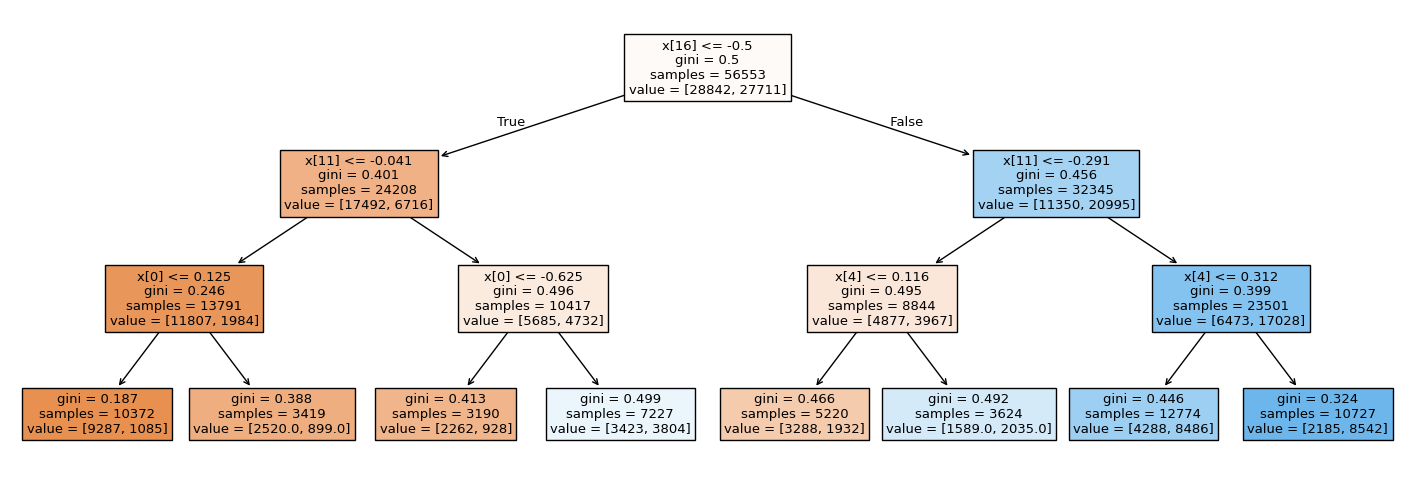

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt.fit(X_train, y_train)

plt.figure(figsize=(18, 6))
plot_tree(dt, filled=True)
plt.show()

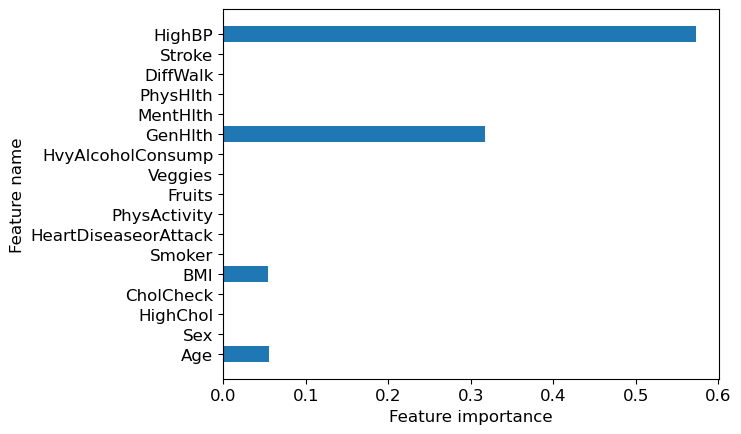

In [87]:
feature_names = X.columns.values

def plot_feature_importances(dt, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), dt.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
plot_feature_importances(dt, feature_names)

<Axes: >

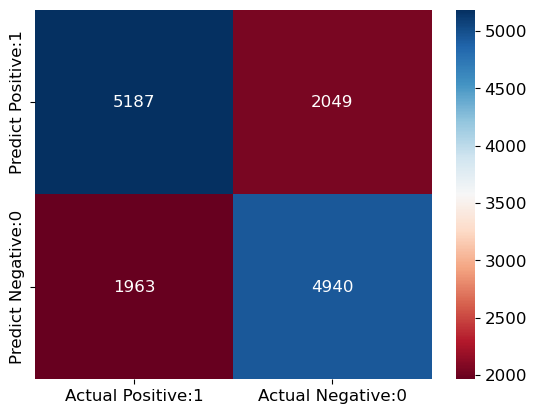

In [88]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdBu')

In [89]:
TP = cm[0, 0]  # True Positive
TN = cm[1, 1]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

In [90]:
print(TP, TN, FP, FN)

5187 4940 2049 1963


In [91]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification Accuracy: {:.4f}'.format(classification_accuracy))

Classification Accuracy: 0.7162


In [92]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error: {:.4f}'.format(classification_error))

Classification Error: 0.2838


In [93]:
precision = TP / float(TP + FP)
print('Precision: {:.4f}'.format(precision))

Precision: 0.7168


In [94]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {:.4f}'.format(recall))

Recall or Sensitivity: 0.7255


In [95]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate: {:.4f}'.format(true_positive_rate))

True Positive Rate: 0.7255


In [96]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate: {:.4f}'.format(false_positive_rate))

False Positive Rate: 0.2932


In [97]:
specificity = TN / (TN + FP)
print('Specificity: {:.4f}'.format(specificity))

Specificity: 0.7068


In [98]:
y_pred_prob = dt.predict_proba(X_test)[0:5]
print('Predicted Probabilities (first 5 rows):\n', y_pred_prob)

Predicted Probabilities (first 5 rows):
 [[0.47364051 0.52635949]
 [0.47364051 0.52635949]
 [0.62988506 0.37011494]
 [0.47364051 0.52635949]
 [0.20369162 0.79630838]]


In [99]:
y_pred_prob = dt.predict_proba(X_test)

# Convert probabilities to a DataFrame
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Diabetes', 'Prob of No Diabetes'])
print(y_pred_prob_df.head())  # Display the first few rows

   Prob of Diabetes  Prob of No Diabetes
0          0.473641             0.526359
1          0.473641             0.526359
2          0.629885             0.370115
3          0.473641             0.526359
4          0.203692             0.796308


In [100]:
y_pred1 = y_pred_prob[:, 1]  # Probabilities for the class 'Diabetes'

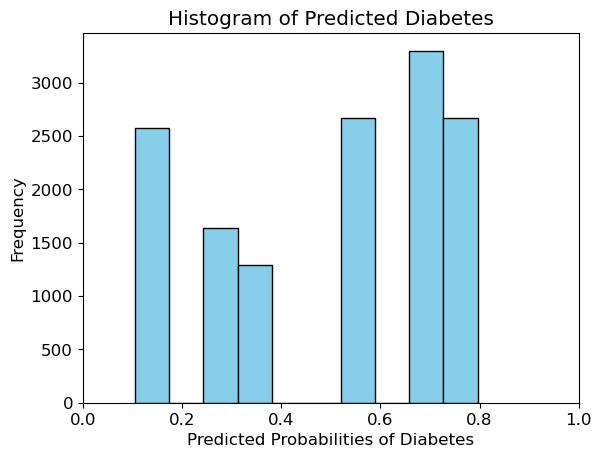

In [101]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Diabetes')
plt.xlim(0, 1)
plt.xlabel('Predicted Probabilities of Diabetes')
plt.ylabel('Frequency')
plt.show()

## Step 7 Comparing both the models

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_predictions = dt.predict(X_test)

gnb_predictions = gnb.predict(X_test)

# Compare Accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, gnb_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")

# Optional: Print Detailed Classification Reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, gnb_predictions))


Decision Tree Accuracy: 0.4882
Naïve Bayes Accuracy: 0.5029

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7236
         1.0       0.49      1.00      0.66      6903

    accuracy                           0.49     14139
   macro avg       0.24      0.50      0.33     14139
weighted avg       0.24      0.49      0.32     14139


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.05      0.09      7236
         1.0       0.50      0.98      0.66      6903

    accuracy                           0.50     14139
   macro avg       0.60      0.51      0.37     14139
weighted avg       0.60      0.50      0.37     14139



C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anish\anacond

In [104]:
from sklearn.model_selection import cross_val_score

dt_cv = cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()
nb_cv = cross_val_score(gnb, X, y, cv=5, scoring='accuracy').mean()

print(f"Decision Tree Cross-Validated Accuracy: {dt_cv:.4f}")
print(f"Naïve Bayes Cross-Validated Accuracy: {nb_cv:.4f}")


Decision Tree Cross-Validated Accuracy: 0.7066
Naïve Bayes Cross-Validated Accuracy: 0.7179


### Conclusion:

Both the models have almost the same acuracy with Decison Tree being 71.28% accurate and Naive Bayes 72.36%. Based on these results, Naïve Bayes is the slightly better model for this dataset due to its balanced and consistent performance. However, Decision Tree is still competitive and may be preferred if interpretability or class-specific optimization is required.